# Ames Housing Saleprice

## Problem Statement

Create a regression model where we are able to predict the price of the house at sales.

## Executive Summary

### Contents:
- [5. Exploratory Data Analysis(EDA)](#5.-Exploratory-Data-Analysis(EDA))


Links:
[Kaggle challenge link](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

## 5. Exploratory Data Analysis(EDA)

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')

In [2]:
# Importing cleaned dataset for EDA
df_train_eda = pd.read_csv("./datasets/train_clean.csv", na_filter=False)

In [3]:
df_train_eda.shape

(2051, 81)

In [4]:
df_train_eda.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [5]:
df_train_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     2051 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
#checking for null value
df_train_eda.isna().sum().sum()

0

## 5.1 removing data with zero correlation to Sales price 
- removing columns that has no correlation to Sales price
- as it will not help us with our predictive model

In [7]:
#remove columns with no correlation to sales price
df_corr = df_train_eda[df_train_eda.columns[1::]].corr()['SalePrice'][:]

df_corr[df_corr <= 0].sort_values(ascending = False)

Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045290
MS SubClass       -0.087335
Overall Cond      -0.097019
Kitchen AbvGr     -0.125444
Enclosed Porch    -0.135656
PID               -0.255052
Name: SalePrice, dtype: float64

In [8]:
#sort out keys with negative correlation with sales price
df_corr[df_corr <= 0].keys()

Index(['PID', 'MS SubClass', 'Overall Cond', 'Low Qual Fin SF',
       'Bsmt Half Bath', 'Kitchen AbvGr', 'Enclosed Porch', 'Misc Val',
       'Yr Sold'],
      dtype='object')

In [9]:
no_corr = ['PID', 'MS SubClass', 'Overall Cond', 'Low Qual Fin SF',
       'Bsmt Half Bath', 'Kitchen AbvGr', 'Enclosed Porch', 'Misc Val',
       'Yr Sold'] # 9 columns removed
df_train_eda.drop(columns=no_corr,inplace = True) #9 columns removed 
df_train_eda.shape

(2051, 72)

## 5.2 Plot data against Sales price
- check for correlation between data
- remove data that has no significant influence to Sales Price

## 5.2.1 Sorting according to datatypes

In [10]:
num_data = df_train_eda.select_dtypes(['int64', 'float64']).keys()
num_data

Index(['Id', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Mo Sold', 'SalePrice'],
      dtype='object')

In [11]:
df_train_eda_num = df_train_eda.loc[:,num_data]
print(df_train_eda_num.shape)
df_train_eda_num.head()

(2051, 30)


,Id,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,3Ssn Porch,Screen Porch,Pool Area,Mo Sold,SalePrice
0,109,0.0,13517,6,1976,2005,289.0,533.0,0.0,192.0,...,1976.0,2.0,475.0,0,44,0,0,0,3,130500
1,544,43.0,11492,7,1996,1997,132.0,637.0,0.0,276.0,...,1997.0,2.0,559.0,0,74,0,0,0,4,220000
2,153,68.0,7922,5,1953,2007,0.0,731.0,0.0,326.0,...,1953.0,1.0,246.0,0,52,0,0,0,1,109000
3,318,73.0,9802,5,2006,2007,0.0,0.0,0.0,384.0,...,2007.0,2.0,400.0,100,0,0,0,0,4,174000
4,255,82.0,14235,6,1900,1993,0.0,0.0,0.0,676.0,...,1957.0,2.0,484.0,0,59,0,0,0,3,138500


In [12]:
def subplot_scatter(xcolumns, xlabels, dataframe = df_train_eda_num):
    nrows = int(np.ceil(len(xcolumns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 4*nrows)) # You'll want to specify your figsize
    plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(xcolumns):  # Gives us an index value to get into all our lists
        sns.scatterplot(dataframe[column], dataframe['SalePrice'], ax = ax[i]) #plot Scatter plot for each data
        ax[i].set_xlabel(xlabels[i])# Set x label for each plot

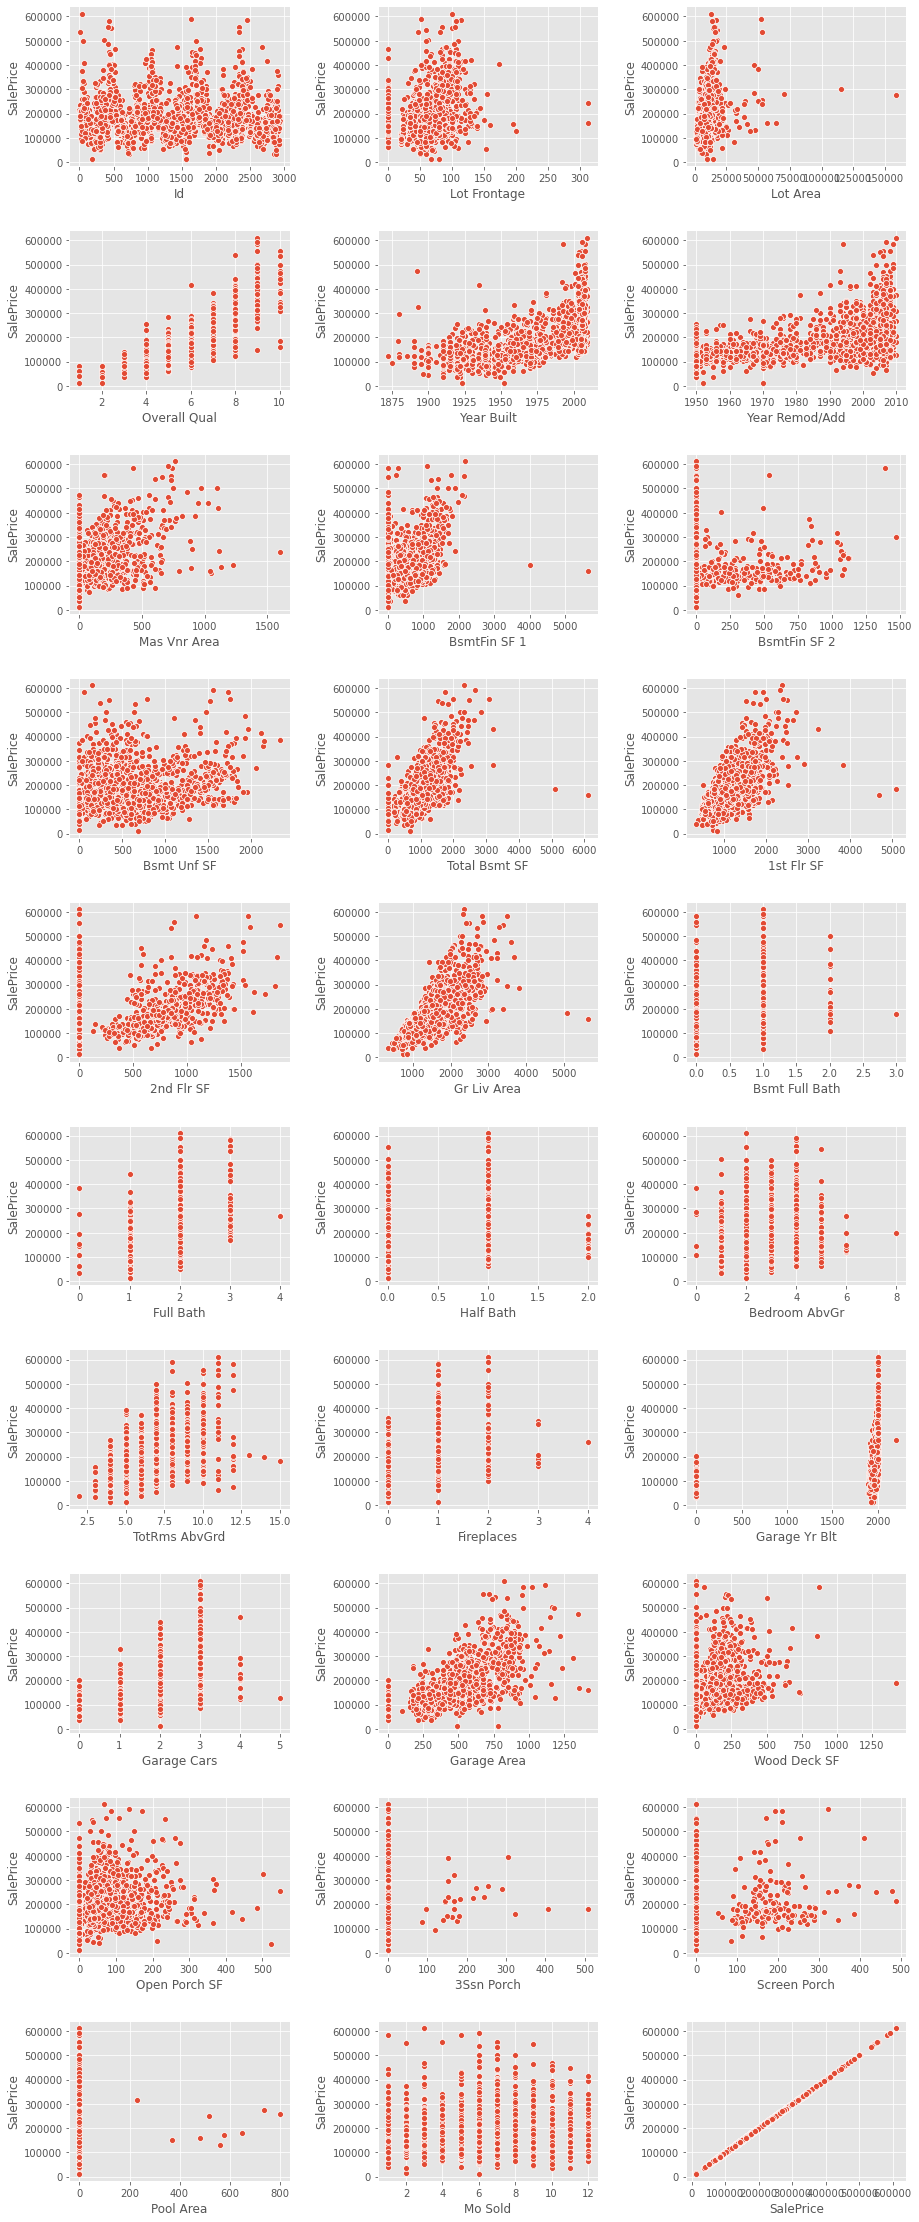

In [13]:
subplot_scatter(xcolumns = num_data, xlabels = num_data)

### 5.2.1 comments on plots:
To be removed: 
- Id: Should be the identification for the house, no relevance to sales price
- Lot Frontage: No clear correlation with Salesprice
- Lot Area: No clear correlation with Salesprice
- Bsmtfin SF 2: Data seems to be around the same prices, otherwise is recorded as not having a basement
- Bsmt Full Bath: No clear correlation with Salesprice
- Half Bath: No clear correlation with Salesprice
- Garage Yr Blt: Too many is built in the 2000s, making all the data congregate in that year, thus not helpful for model
- 3Ssn Porch: too many null value
- Screen Porch: data seems to be randomly spread, no correlation to sales price
- Pool Area: too little house has pool area
- Mo Sold: no correlation to sales price

In [14]:
# dropping redundant datas
scatter_to_drop = ['Id' , 'Lot Frontage', 'Lot Area',
           'BsmtFin SF 2', 'Bsmt Full Bath', 'Half Bath', 
           'Garage Yr Blt', '3Ssn Porch', 'Screen Porch', 
           'Pool Area', 'Mo Sold'] # 11 columns removed
df_train_eda.drop(columns=scatter_to_drop,inplace = True) #11 columns removed 
df_train_eda.shape

(2051, 61)

## 5.2.2 Sorting Object Dtypes

In [15]:
obj_data = df_train_eda.select_dtypes(['object']).keys()
obj_data

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [16]:
len(obj_data)

42

In [17]:
df_train_eda_obj = df_train_eda.loc[:, obj_data]
df_train_eda_obj['SalePrice'] = df_train_eda['SalePrice'] #adding in saleprice column for obj dataframe
print(df_train_eda_obj.shape)
df_train_eda_obj.head()

(2051, 43)


,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,SalePrice
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,130500
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,220000
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,109000
3,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,WD,174000
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,Detchd,Unf,TA,TA,N,NA,NA,NA,WD,138500


In [18]:
def subplot_boxplot(xcolumns, xlabels, dataframe = df_train_eda_obj):
    nrows = int(np.ceil(len(xcolumns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14, 5*nrows)) # You'll want to specify your figsize
    plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(xcolumns):  # Gives us an index value to get into all our lists
        sns.boxplot(x = column, y = 'SalePrice', ax = ax[i], data = dataframe) #plot Scatter plot for each data
        
        medians = dataframe.groupby(column)['SalePrice'].median().values # Calculate number of obs per group & median to position labels
        nobs = dataframe[column].value_counts().values
        nobs = [str(x) for x in nobs.tolist()]
        nobs = ["n: " + i for i in nobs]
        
        pos = range(len(nobs))
        for tick,label in zip(pos,ax[i].get_xticklabels()):
            ax[i].text(pos[tick], medians[tick] + 0.03, nobs[tick],
                    horizontalalignment='center', size='x-small', color='r', weight='semibold')

        
        ax[i].set_xlabel(xlabels[i])# Set x label for each plot
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45);

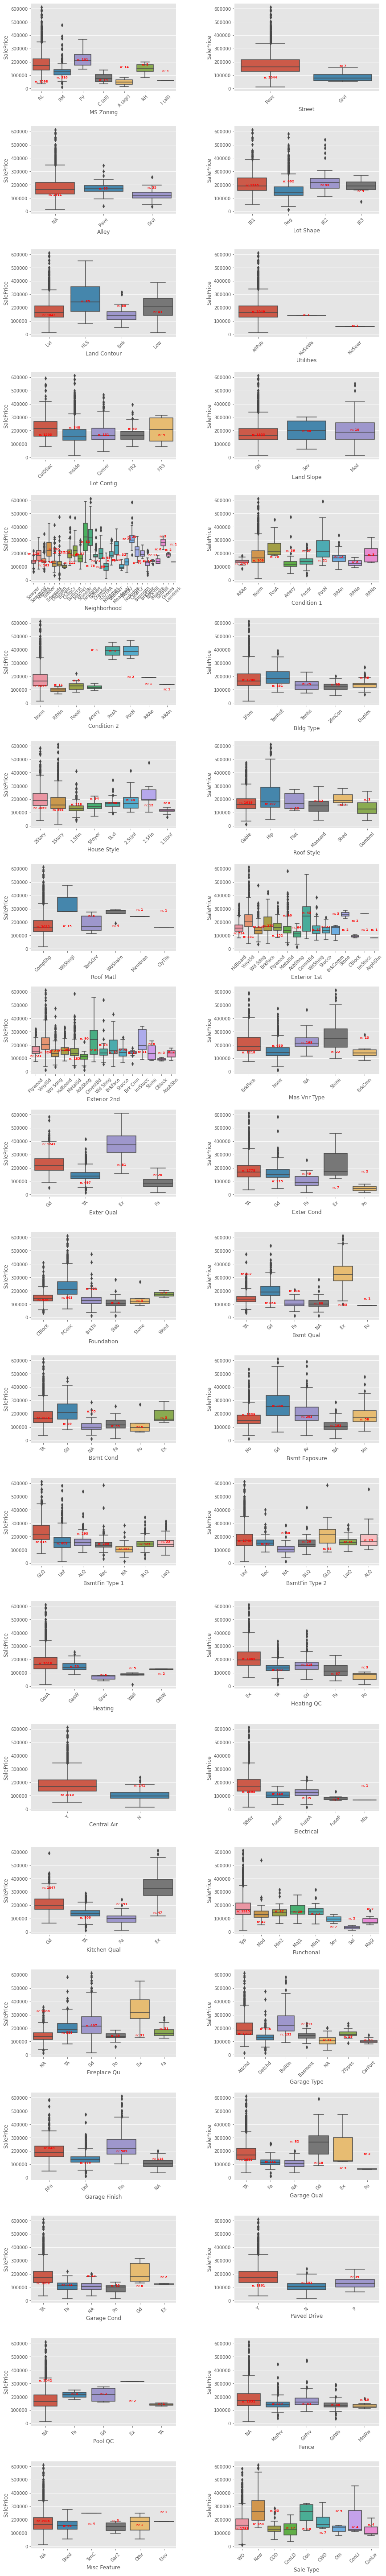

In [19]:
subplot_boxplot(xcolumns = obj_data, xlabels = obj_data)

## 5.2.2 comments:
To be removed:
- Utilities 
- Lot Shape 
- Land Contour 
- Lot Config
- Land Slope 
- Condition 2
- Roof Matl
- Mas Vnr Type
- BsmtFin Type 2
- Pool QC
- Fence 
- Misc Feature

In [20]:
# dropping redundant datas
box_to_drop = ['Utilities', 'Lot Shape', 'Land Contour', 
               'Lot Config', 'Land Slope', 'Condition 2',
               'Roof Matl', 'Mas Vnr Type', 'BsmtFin Type 2',
               'Pool QC', 'Fence', 'Misc Feature'] # 12 columns removed
df_train_eda.drop(columns=box_to_drop,inplace = True) #12 columns removed 
df_train_eda.shape

(2051, 49)

In [21]:
df_train_eda.columns

Index(['MS Zoning', 'Street', 'Alley', 'Neighborhood', 'Condition 1',
       'Bldg Type', 'House Style', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Full Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Sale Type',
       'SalePrice'],
      dtype='object')

In [23]:
#32 columns were removed after EDA

#export dataset for Pre - Processing

df_train_eda.to_csv("./datasets/train_EDA_sorted.csv", index=False)

# To be continued